# This file is part of the first CA of CCT College Dublin student Illia Fadieiev

## Importing needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Reading dataset

In [2]:
df = pd.read_csv("main_dataset.csv")

In [3]:
df.head(5)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


## Remove unnecessary data

In [4]:
unique_age_groups = df['Age Group'].unique()
print(unique_age_groups)

['Under 1 year' '0 - 4 years' '0 - 14 years' '1 - 4 years' '5 - 9 years'
 '10 - 14 years' '15 - 19 years' '15 - 24 years' '15 years and over'
 '20 - 24 years' '25 - 29 years' '25 - 44 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '45 - 64 years'
 '50 - 54 years' '55 - 59 years' '60 - 64 years' '65 - 69 years'
 '65 years and over' '70 - 74 years' '75 - 79 years' '80 - 84 years'
 '85 years and over' 'All ages']


In [5]:
selected_age_groups = ['Under 1 year', '1 - 4 years', '0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']

In [6]:
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
df = filtered_by_age_groups_df
df.head(20)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN
5,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,NaN
9,Population Estimates (Persons in April),1950,1 - 4 years,Both sexes,Thousand,249.1
10,Population Estimates (Persons in April),1950,1 - 4 years,Male,Thousand,127.5
11,Population Estimates (Persons in April),1950,1 - 4 years,Female,Thousand,121.6
12,Population Estimates (Persons in April),1950,5 - 9 years,Both sexes,Thousand,278.9


In [7]:
df.drop(columns=["STATISTIC Label", "UNIT"], inplace=True)

## Check for missing values

In [8]:
missing_values = df.isnull().sum()
print("Кількість відсутніх значень в кожній колонці:")
print(missing_values)

Кількість відсутніх значень в кожній колонці:
Year           0
Age Group      0
Sex            0
VALUE        114
dtype: int64


In [9]:
missing_values = df[df['VALUE'].isnull() | df['Year'].isnull() | df['Sex'].isnull() | df['Age Group'].isnull()]

print("Missing values for Year, Sex, and Age Group:")
print(missing_values)

Missing values for Year, Sex, and Age Group:
      Year    Age Group         Sex  VALUE
3     1950  0 - 4 years  Both sexes    NaN
4     1950  0 - 4 years        Male    NaN
5     1950  0 - 4 years      Female    NaN
165   1952  0 - 4 years  Both sexes    NaN
166   1952  0 - 4 years        Male    NaN
...    ...          ...         ...    ...
3568  1994  0 - 4 years        Male    NaN
3569  1994  0 - 4 years      Female    NaN
3648  1995  0 - 4 years  Both sexes    NaN
3649  1995  0 - 4 years        Male    NaN
3650  1995  0 - 4 years      Female    NaN

[114 rows x 4 columns]


In [10]:
filled_df = pd.DataFrame(columns=df.columns)

grouped_df = df.groupby(['Year', 'Sex'])

for (year, sex), group in grouped_df:
    if group.loc[group['Age Group'] == '0 - 4 years', 'VALUE'].isnull().all():
        total_value = group.loc[group['Age Group'].isin(['Under 1 year', '1 - 4 years']), 'VALUE'].sum()
        
        group.loc[group['Age Group'] == '0 - 4 years', 'VALUE'] = total_value
        
    filled_df = pd.concat([filled_df, group])

filled_df.reset_index(drop=True, inplace=True)

df = filled_df

In [11]:
selected_age_groups = ['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
df = filtered_by_age_groups_df
df.head(20)

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6
7,1950,25 - 29 years,Both sexes,201.1
8,1950,30 - 34 years,Both sexes,194.8
9,1950,35 - 39 years,Both sexes,199.8
10,1950,40 - 44 years,Both sexes,177.9
11,1950,45 - 49 years,Both sexes,163.8


## Visualization of age structure of population in 1950-2023

In [12]:
filtered_by_sex_df = df[df['Sex'].isin(["Both sexes"])]
filtered_by_sex_df.head()

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6


<Figure size 1000x600 with 0 Axes>

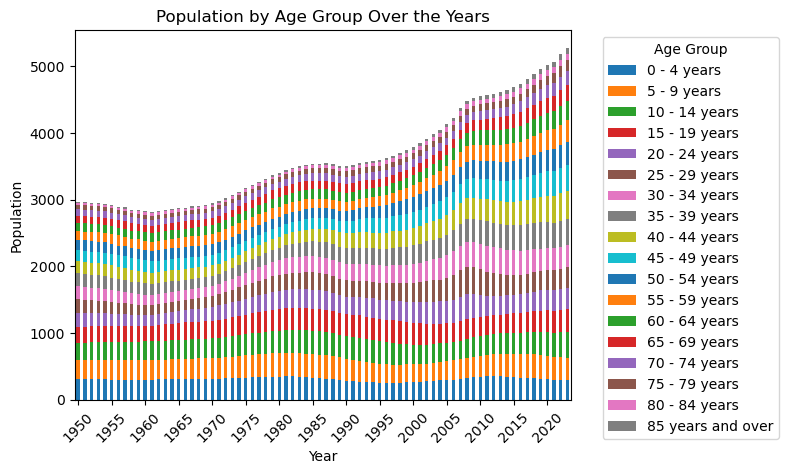

In [13]:
age_group_dtype = pd.CategoricalDtype(categories=selected_age_groups, ordered=True)

filtered_by_sex_df_copy = filtered_by_sex_df.copy()

filtered_by_sex_df_copy['Age Group'] = filtered_by_sex_df_copy['Age Group'].astype(age_group_dtype)

grouped_df = filtered_by_sex_df_copy.groupby(['Year', 'Age Group'])['VALUE'].sum().reset_index()

pivot_df = grouped_df.pivot(index='Year', columns='Age Group', values='VALUE')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Age Group Over the Years')
plt.legend(title='Age Group')

years = pivot_df.index
plt.xticks(range(0, len(years), 5), years[::5], rotation=45)

plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [14]:
def plot_population_pyramid(df, years):
    colors = ['pink', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed

    fig, ax1 = plt.subplots(figsize=(10, 6))

    for i, year in enumerate(years):
        male_data = df[((df['Year'] == year) & 
                        df['Age Group'].isin(selected_age_groups)) & 
                       (df['Sex'] == 'Male')].copy()
        female_data = df[((df['Year'] == year) & 
                          df['Age Group'].isin(selected_age_groups)) & 
                         (df['Sex'] == 'Female')].copy()

        ax1.barh(female_data['Age Group'], female_data['VALUE'], color=colors[i], label=f'Female ({year})')

        ax1.barh(male_data['Age Group'], -male_data['VALUE'], color=colors[i], label=f'Male ({year})')

    ax1.set_xlabel('Population (in Thousands)')
    ax1.set_ylabel('Age Group')

    ax1.axvline(x=0, color='black', linewidth=1)

    plt.title('Population Pyramid of Selected Age Groups in Ireland')

    plt.legend()
    plt.show()

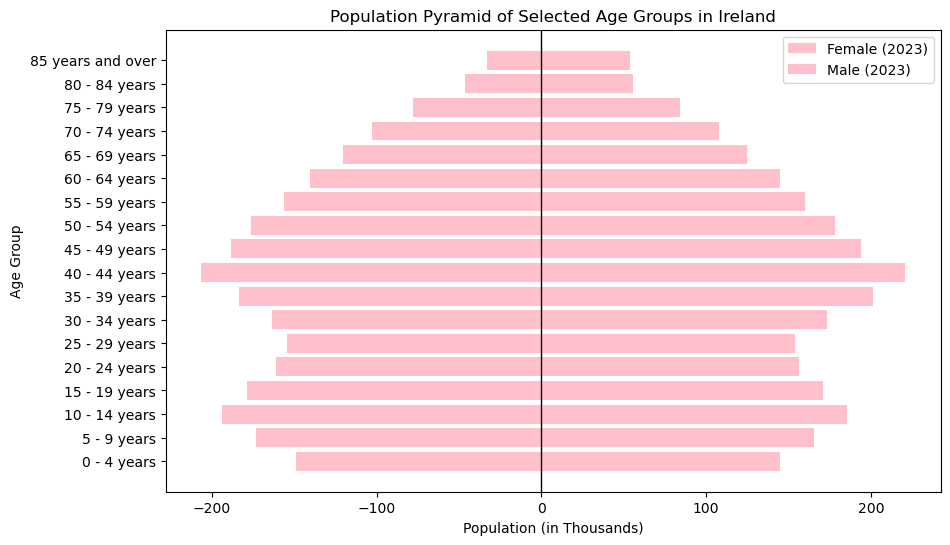

In [15]:
plot_population_pyramid(df, [2023])

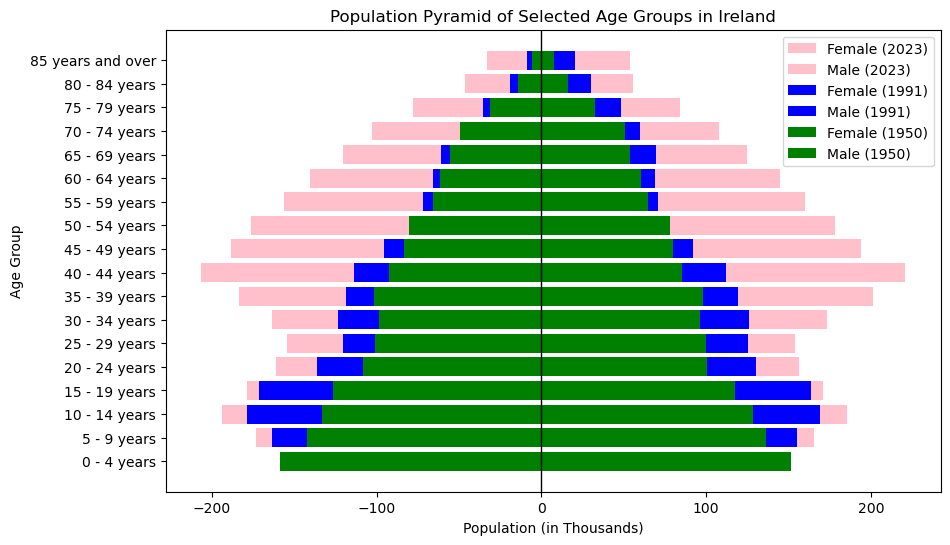

In [16]:
plot_population_pyramid(df, [2023, 1991, 1950])

## Counting the average age

In [17]:
both_sexes_df = df[(df['Sex'] == 'Both sexes')].copy()
saved_df = df
both_sexes_df.head(20)

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6
7,1950,25 - 29 years,Both sexes,201.1
8,1950,30 - 34 years,Both sexes,194.8
9,1950,35 - 39 years,Both sexes,199.8
10,1950,40 - 44 years,Both sexes,177.9
11,1950,45 - 49 years,Both sexes,163.8


In [18]:
both_sexes_df['midpoint'] = both_sexes_df['Age Group'].apply(lambda age_group: int(age_group.split('-')[0]) + 2 if age_group != '85 years and over' else 92.5)
both_sexes_df.head(20)

,Year,Age Group,Sex,VALUE,midpoint
1,1950,0 - 4 years,Both sexes,310.2,2.0
3,1950,5 - 9 years,Both sexes,278.9,7.0
4,1950,10 - 14 years,Both sexes,262.1,12.0
5,1950,15 - 19 years,Both sexes,244.0,17.0
6,1950,20 - 24 years,Both sexes,208.6,22.0
7,1950,25 - 29 years,Both sexes,201.1,27.0
8,1950,30 - 34 years,Both sexes,194.8,32.0
9,1950,35 - 39 years,Both sexes,199.8,37.0
10,1950,40 - 44 years,Both sexes,177.9,42.0
11,1950,45 - 49 years,Both sexes,163.8,47.0


In [19]:
import pandas as pd

def calculate_mean_age(both_sexes_df):
    # Multiply the "VALUE" column by the "midpoint" column for each row
    result_df = both_sexes_df.copy()
    result_df["result"] = result_df["VALUE"] * result_df["midpoint"]
    
    # Group the data by "Year" and calculate the sum of the "result" and "VALUE" columns
    sum_result = result_df.groupby("Year")["result"].sum()
    sum_value = result_df.groupby("Year")["VALUE"].sum()
    
    # Calculate the mean age for each year
    mean_age = sum_result / sum_value
    
    # Convert the series to a dataframe and reset the index
    mean_age_df = mean_age.to_frame().reset_index()
    
    # Rename the columns
    mean_age_df.columns = ["Year", "Mean Age"]
    
    # Return the result
    return mean_age_df

In [20]:
result_df = calculate_mean_age(both_sexes_df)
print(result_df)

    Year   Mean Age
0   1950  32.026659
1   1951  32.042272
2   1952  32.081615
3   1953  32.119278
4   1954  32.157776
..   ...        ...
69  2019  37.590915
70  2020  37.849099
71  2021  38.153221
72  2022  38.457243
73  2023  38.685389

[74 rows x 2 columns]


In [21]:
def visualize_mean_age(result_df):
    # Set the plot style
    sns.set_style("whitegrid")
    
    # Create a line plot of the mean age for each year
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=result_df, x="Year", y="Mean Age")
    
    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Mean Age")
    plt.title("Mean Age for Each Year")
    
    # Show the plot
    plt.show()

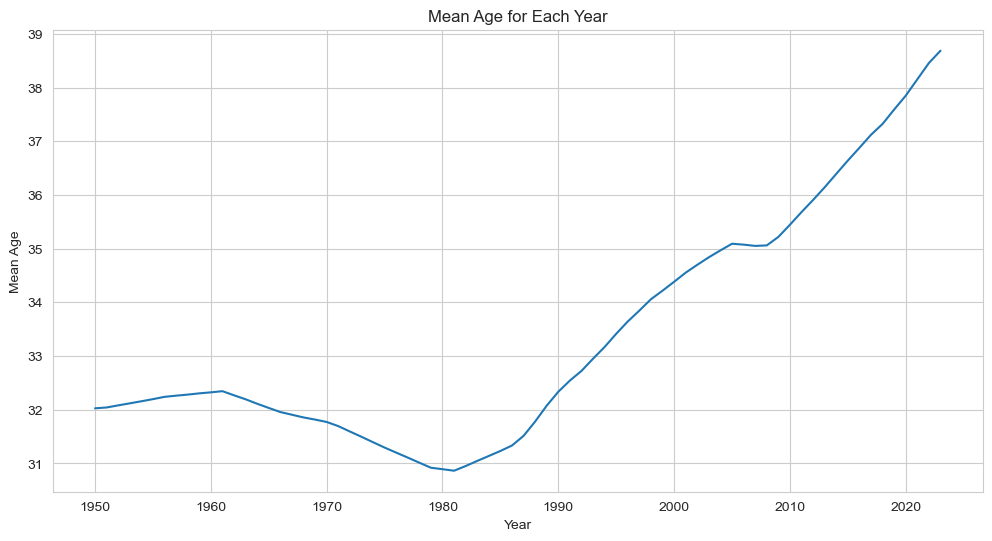

In [22]:
visualize_mean_age(result_df)

## Calculation of population of each age

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Initialize an empty list to store the new rows
new_rows = []

# Regular expression pattern to extract lower and upper age limits
pattern = r'(\d+) - (\d+) years|(\d+) years and over'

# Iterate through each row in the original dataframe
for index, row in both_sexes_df.iterrows():
    # Extract lower and upper age limits using regex
    match = re.match(pattern, row['Age Group'])
    lower_age, upper_age_1, upper_age_2 = map(lambda x: int(x) if x else 0, match.groups())

    # Determine the upper age limit based on the pattern matched
    upper_age = upper_age_1 or upper_age_2 or 100
    
    # Create rows with ages ranging from 0 to 100 for each year in the age group
    for age in range(lower_age, upper_age + 1):
        new_row = {
            'Year': row['Year'],
            'Age Group': row['Age Group'],  # Updated age group format
            'midpoint': row['midpoint'],   # Same midpoint as in the original row
            'age': age                     # New 'age' column
        }
        new_rows.append(new_row)

# Create a new dataframe with the updated information
new_df = pd.DataFrame(new_rows)

# Print the new dataframe
print(new_df)

       Year          Age Group  midpoint  age
0      1950        0 - 4 years       2.0    0
1      1950        0 - 4 years       2.0    1
2      1950        0 - 4 years       2.0    2
3      1950        0 - 4 years       2.0    3
4      1950        0 - 4 years       2.0    4
...     ...                ...       ...  ...
12649  2023  85 years and over      92.5   81
12650  2023  85 years and over      92.5   82
12651  2023  85 years and over      92.5   83
12652  2023  85 years and over      92.5   84
12653  2023  85 years and over      92.5   85

[12654 rows x 4 columns]


    Age  Predicted_VALUE
0     0        37.826733
1     1        48.540942
2     2        56.874448
3     3        63.183824
4     4        67.789040
..  ...              ...
86   86        16.472671
87   87        15.458009
88   88        14.728976
89   89        14.358046
90   90        14.430134

[91 rows x 2 columns]


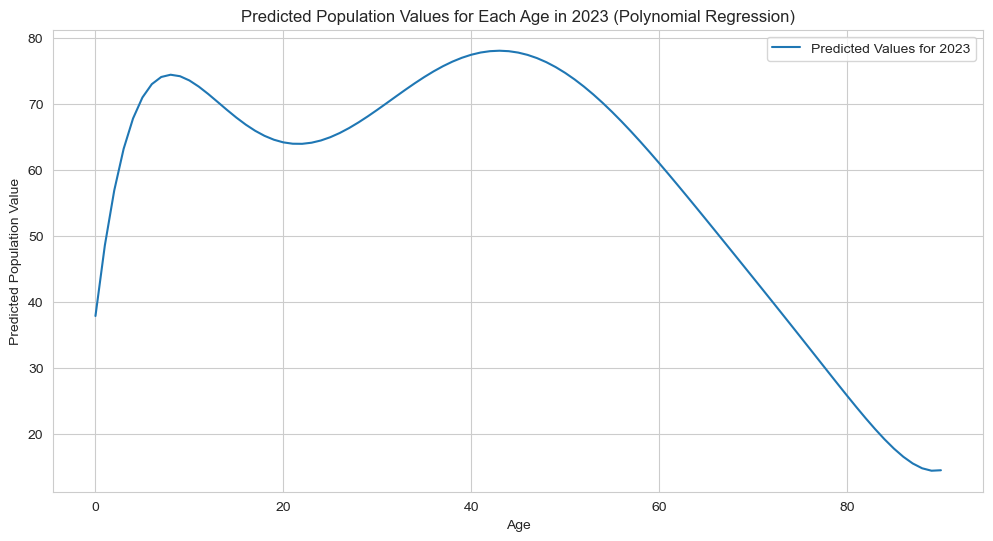

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
# both_sexes_df = ...

# Specify the year for prediction
prediction_year = 2023

# Filter the data for the specified year
year_data = both_sexes_df[both_sexes_df['Year'] == prediction_year]

# Initialize an empty DataFrame to store the predictions
predictions_df = pd.DataFrame(columns=['Age', 'Predicted_VALUE'])

# Extract features (midpoint) and target values (VALUE)
X = year_data['midpoint'].values.reshape(-1, 1)
y = year_data['VALUE'].values

# Try a higher-degree polynomial (e.g., degree = 3)
degree = 7

# Create a polynomial regression model with degree 'degree'
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit the model with the data
model = LinearRegression()
model.fit(X_poly, y)

# ...

# Predict population values for ages 0-100 years
ages_to_predict = np.arange(0, 91).reshape(-1, 1)
X_to_predict_poly = poly_features.transform(ages_to_predict)
predicted_values = model.predict(X_to_predict_poly)

# Scale down the predicted values by a factor of 5
predicted_values_scaled = 0.2 * predicted_values

# Create a DataFrame with predicted values for the specified year
predictions_df['Age'] = np.arange(0,91)
predictions_df['Predicted_VALUE'] = np.clip(predicted_values_scaled, a_min=0, a_max=None)

# Now predictions_df contains the clipped predicted population values for each age for the specified year, scaled down by a factor of 5
print(predictions_df)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Age'], predictions_df['Predicted_VALUE'], label=f'Predicted Values for {prediction_year}')

plt.xlabel('Age')
plt.ylabel('Predicted Population Value')
plt.title(f'Predicted Population Values for Each Age in {prediction_year} (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import pandas as pd

# Sample data (assuming predictions_df is already populated)
# predictions_df = ...

# Create a mapping of age ranges to the corresponding Age Group
age_ranges = [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 100)]

# Initialize a list to store DataFrames for concatenation
dfs_to_concat = []

# Populate the new DataFrames with the mapped age ranges and predicted values
for age_range in age_ranges:
    start_age, end_age = age_range
    age_group = f'{start_age} - {end_age} years'
    midpoint = (start_age + end_age) / 2
    predicted_value = predictions_df.loc[(predictions_df['Age'] >= start_age) & (predictions_df['Age'] <= end_age), 'Predicted_VALUE'].sum()

    df = pd.DataFrame({
        'Age Group': [age_group],
        'Sex': ['Both sexes'],  # Assuming 'Both sexes' for all rows, modify if needed
        'VALUE': [predicted_value],
        'midpoint': [midpoint]
    })

    dfs_to_concat.append(df)

# Concatenate the DataFrames into the formatted DataFrame
formatted_predictions_df = pd.concat(dfs_to_concat, ignore_index=True)

# Display the formatted DataFrame
print(formatted_predictions_df)


         Age Group         Sex       VALUE  midpoint
0      0 - 4 years  Both sexes  274.214987       2.0
1      5 - 9 years  Both sexes  366.683334       7.0
2    10 - 14 years  Both sexes  357.077959      12.0
3    15 - 19 years  Both sexes  330.421543      17.0
4    20 - 24 years  Both sexes  320.635176      22.0
5    25 - 29 years  Both sexes  332.184059      27.0
6    30 - 34 years  Both sexes  355.654175      32.0
7    35 - 39 years  Both sexes  378.138570      37.0
8    40 - 44 years  Both sexes  389.311867      42.0
9    45 - 49 years  Both sexes  384.071645      47.0
10   50 - 54 years  Both sexes  362.625317      52.0
11   55 - 59 years  Both sexes  328.901145      57.0
12   60 - 64 years  Both sexes  288.162005      62.0
13   65 - 69 years  Both sexes  244.700558      67.0
14   70 - 74 years  Both sexes  200.494435      72.0
15   75 - 79 years  Both sexes  155.700088      77.0
16   80 - 84 years  Both sexes  111.863922      82.0
17  85 - 100 years  Both sexes   93.159483    

In [27]:
both_sexes_df[both_sexes_df['Year'] == prediction_year]

,Year,Age Group,Sex,VALUE,midpoint
4381,2023,0 - 4 years,Both sexes,293.8,2.0
4383,2023,5 - 9 years,Both sexes,338.6,7.0
4384,2023,10 - 14 years,Both sexes,379.2,12.0
4385,2023,15 - 19 years,Both sexes,349.5,17.0
4386,2023,20 - 24 years,Both sexes,317.8,22.0
4387,2023,25 - 29 years,Both sexes,308.5,27.0
4388,2023,30 - 34 years,Both sexes,337.0,32.0
4389,2023,35 - 39 years,Both sexes,384.5,37.0
4390,2023,40 - 44 years,Both sexes,427.7,42.0
4391,2023,45 - 49 years,Both sexes,382.7,47.0


In [28]:
df = saved_df
df.head(20)

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6
7,1950,25 - 29 years,Both sexes,201.1
8,1950,30 - 34 years,Both sexes,194.8
9,1950,35 - 39 years,Both sexes,199.8
10,1950,40 - 44 years,Both sexes,177.9
11,1950,45 - 49 years,Both sexes,163.8
